# Heart Failure Prediction


**Table of contents**<a id='toc0_'></a>

- 1. [Data Preparation](#toc1_)
  - 1.1. [Data Collection and Ingestion](#toc1_1_)
- 2. [Exploratory Data Analysis (EDA) and Visualization](#toc2_)
  - 2.1. [Univariate Analysis](#toc2_1_)
  - 2.2. [Bivariate/Multivariate Analysis](#toc2_2_)
    - 2.2.1. [Numerical values](#toc2_2_1_)
    - 2.2.2. [Binary values](#toc2_2_2_)
    - 2.2.3. [Categorical columns](#toc2_2_3_)
- 3. [Splitting Data For Modeling](#toc3_)
- 4. [Modeling Approaches without Data Preperation](#toc4_)
- 5. [Data Prepearation for Modeling](#toc5_)
  - 5.1. [Encoding Categorical Variables](#toc5_1_)
  - 5.2. [Transformations for Numeric Features](#toc5_2_)
- 6. [Modeling Approaches with Data Preperation](#toc6_)
- 7. [Models results visualization and comparison](#toc7_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)

from xgboost import XGBClassifier

## 1. <a id='toc1_'></a>[Data Preparation](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Data Collection and Ingestion](#toc0_)


In [200]:
dataset = pd.read_csv("./data/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [201]:
before_duplicates_drop_len = len(dataset)
dataset.drop_duplicates(inplace=True)
after_duplicates_drop_len = len(dataset)

duplicates_count = before_duplicates_drop_len - after_duplicates_drop_len

print(f"Size before duplicates drop {before_duplicates_drop_len}")
print(f"Size after duplicates drop {after_duplicates_drop_len}")
print(f"Number of duplicates: {duplicates_count}")

Size before duplicates drop 1025
Size after duplicates drop 302
Number of duplicates: 723


In [202]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [203]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2. <a id='toc2_'></a>[Exploratory Data Analysis (EDA) and Visualization](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Univariate Analysis](#toc0_)


In [204]:
numerical_columns = dataset[["age", "trestbps", "chol", "thalach", "oldpeak"]].copy()
binary_columns = dataset[["sex", "fbs", "exang", "target"]].copy()
categorical_columns = dataset[["cp", "restecg", "slope", "ca", "thal"]].copy()

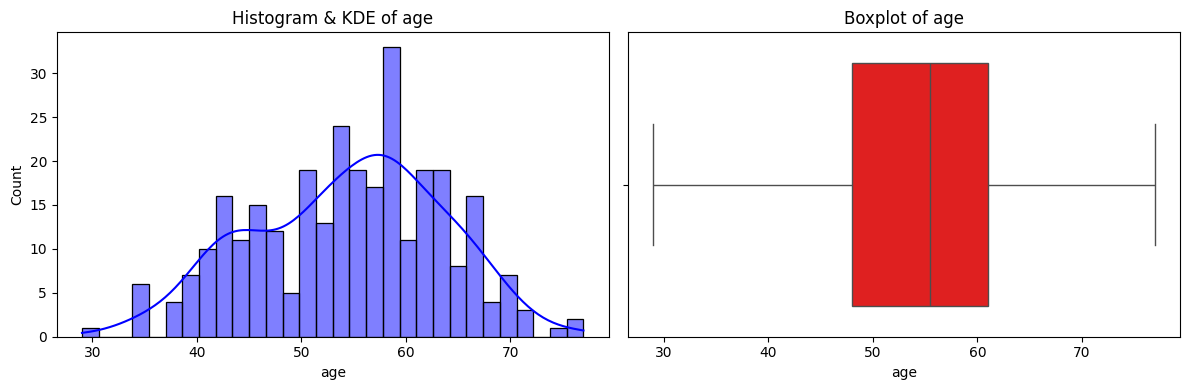

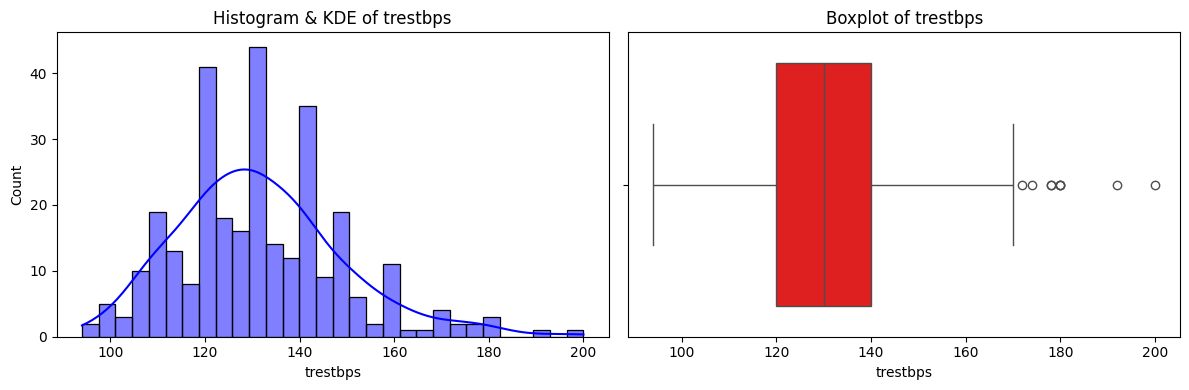

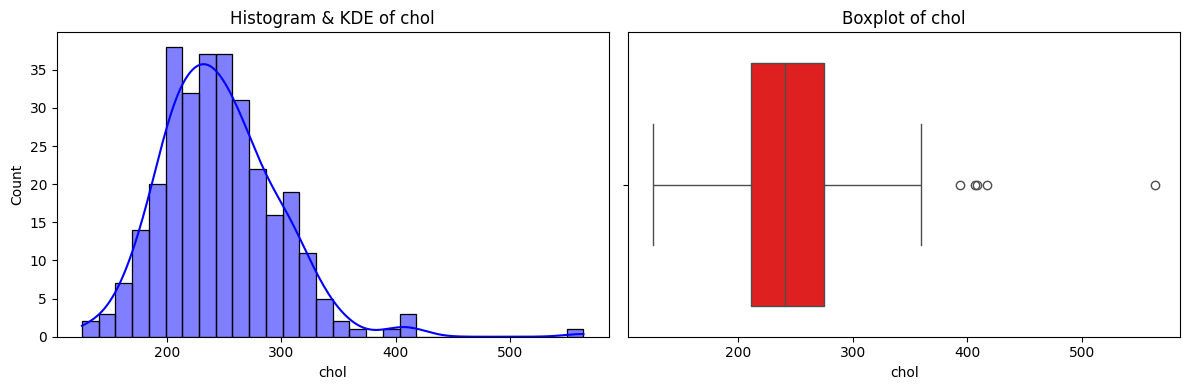

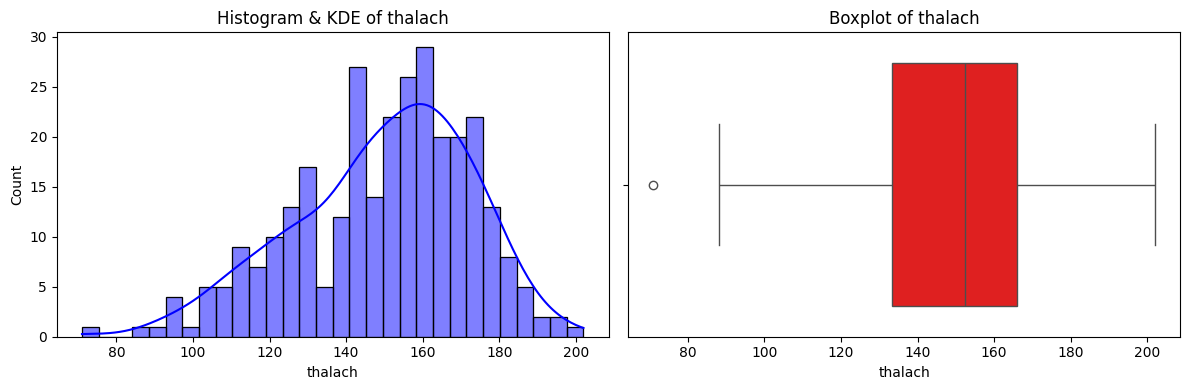

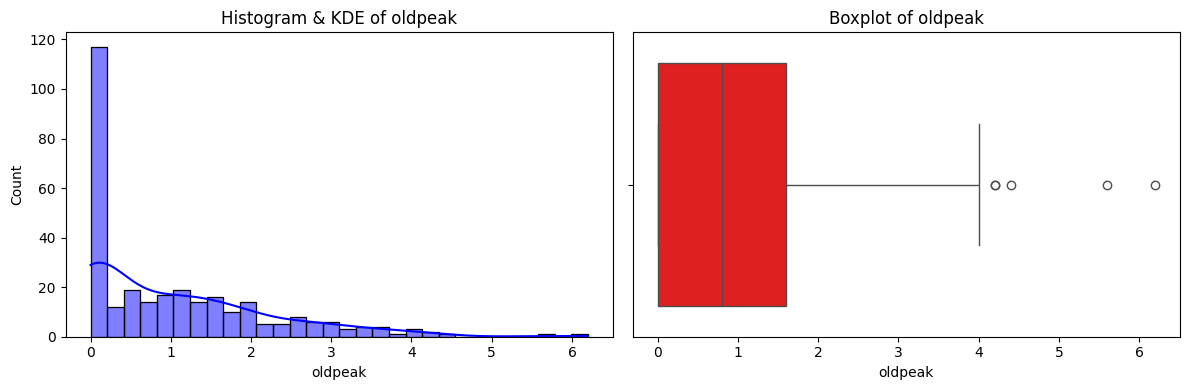

In [205]:
numerical_summary = numerical_columns.describe().T
numerical_summary["skewness"] = numerical_columns.skew()
numerical_summary["kurtosis"] = numerical_columns.kurtosis()

for col in numerical_columns.columns:
    _, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(numerical_columns[col], kde=True, bins=30, ax=axes[0], color="blue")
    axes[0].set_title(f"Histogram & KDE of {col}")

    sns.boxplot(x=numerical_columns[col], ax=axes[1], color="red")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

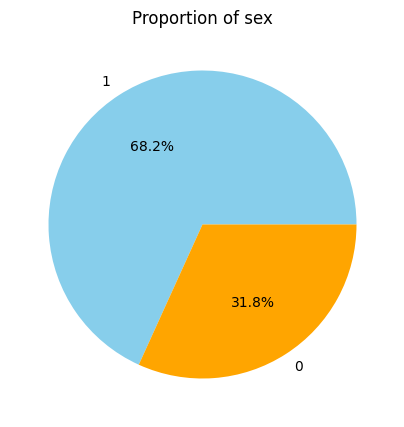

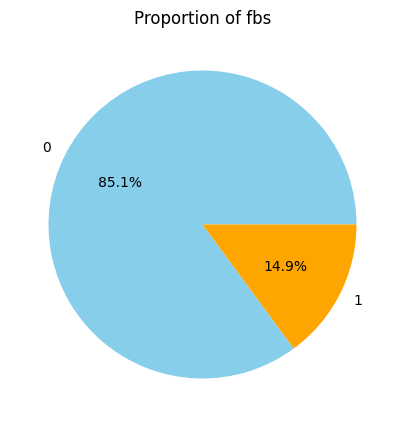

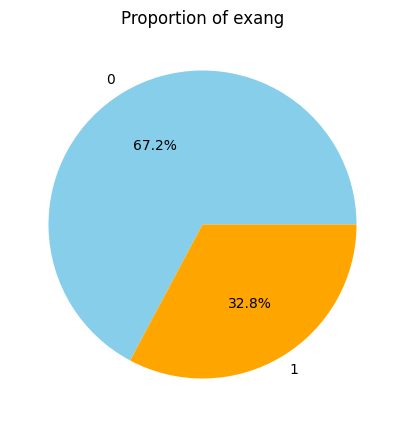

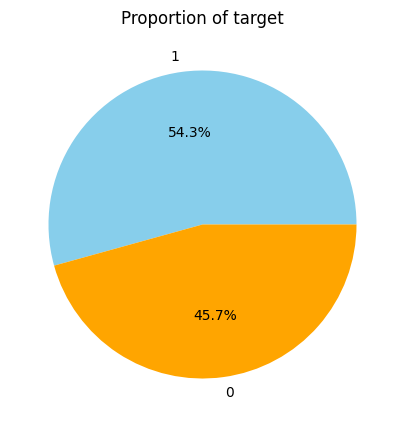

In [206]:
for col in binary_columns.columns:
    plt.figure(figsize=(5, 5))
    binary_columns[col].value_counts().plot.pie(
        autopct="%1.1f%%", colors=["skyblue", "orange"]
    )
    plt.title(f"Proportion of {col}")
    plt.ylabel("")
    plt.show()

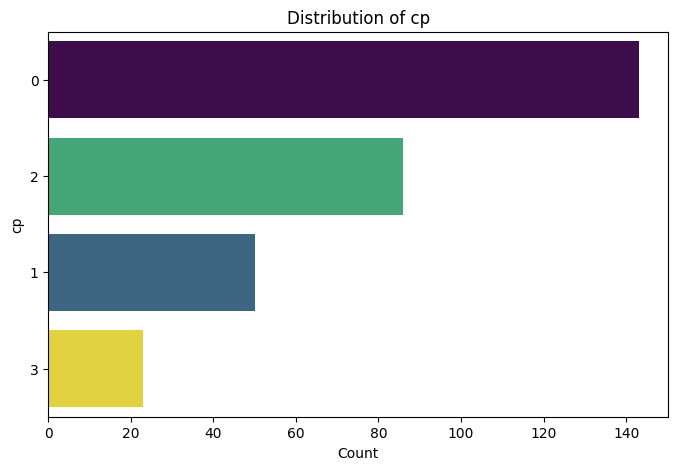

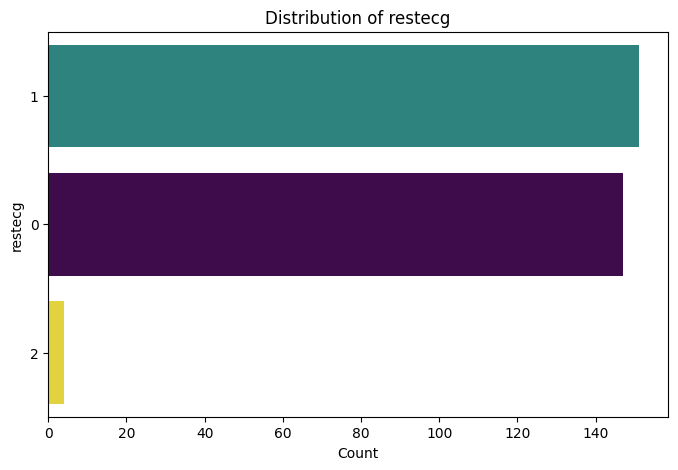

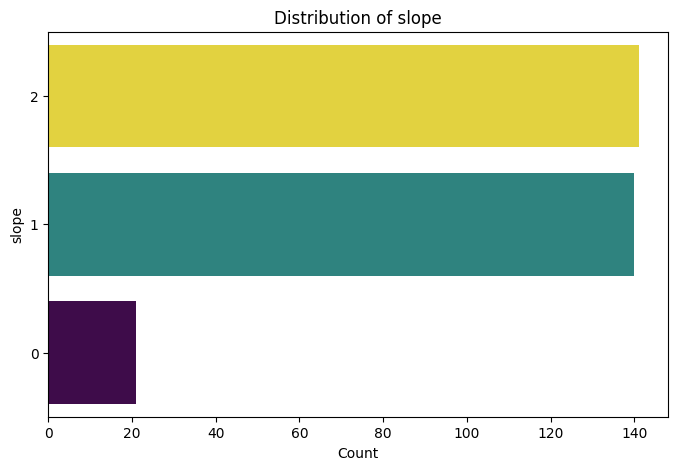

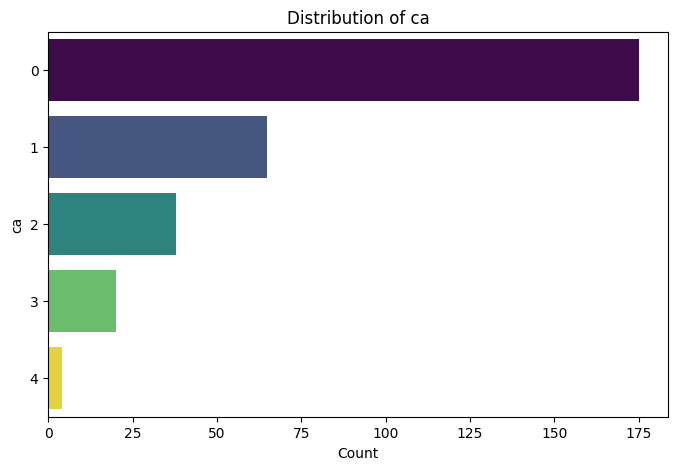

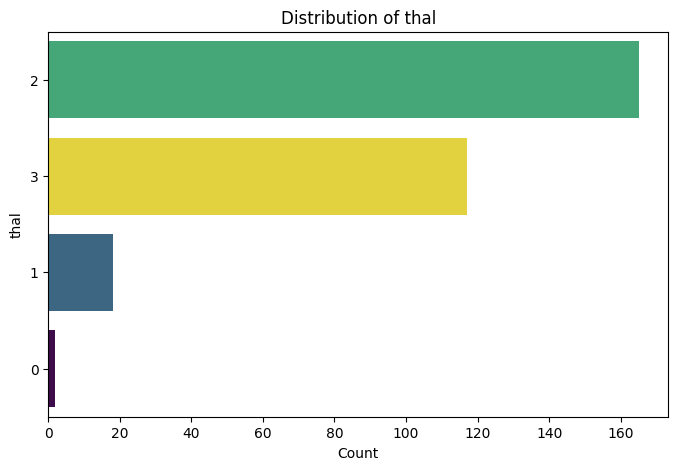

In [207]:
for col in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y=categorical_columns[col],
        hue=categorical_columns[col],
        legend=False,
        order=categorical_columns[col].value_counts().index,
        palette="viridis",
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

### 2.2. <a id='toc2_2_'></a>[Bivariate/Multivariate Analysis](#toc0_)


#### 2.2.1. <a id='toc2_2_1_'></a>[Numerical values](#toc0_)


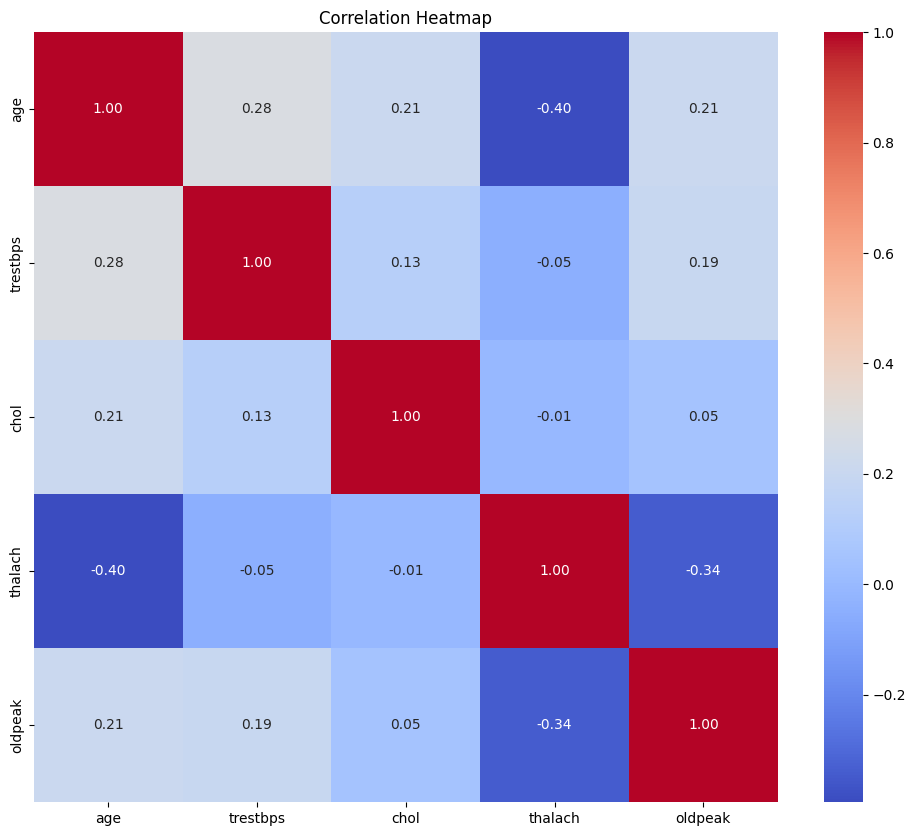

In [208]:
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_columns.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

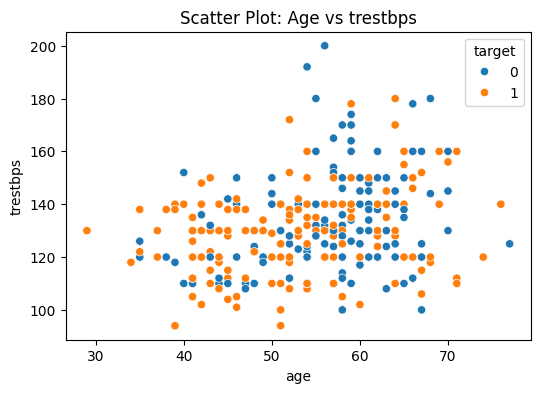

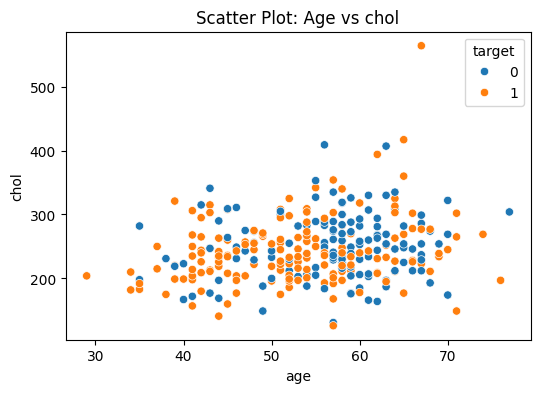

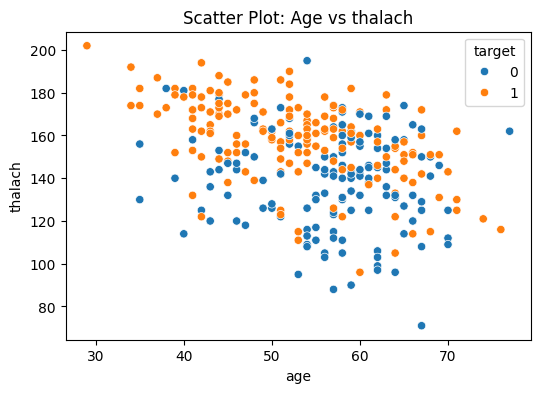

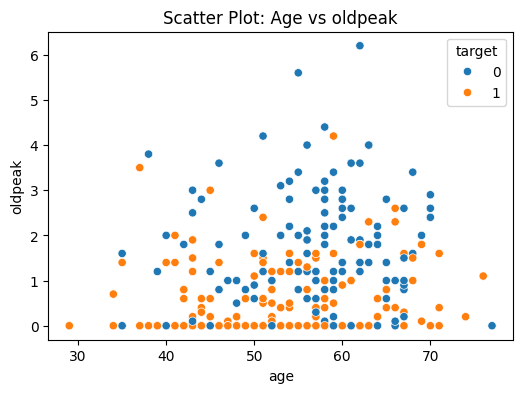

In [209]:
for col in numerical_columns.columns:
    if col != "age":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            x=numerical_columns["age"],
            y=numerical_columns[col],
            hue=binary_columns["target"],
        )
        plt.title(f"Scatter Plot: Age vs {col}")
        plt.show()

#### 2.2.2. <a id='toc2_2_2_'></a>[Binary values](#toc0_)


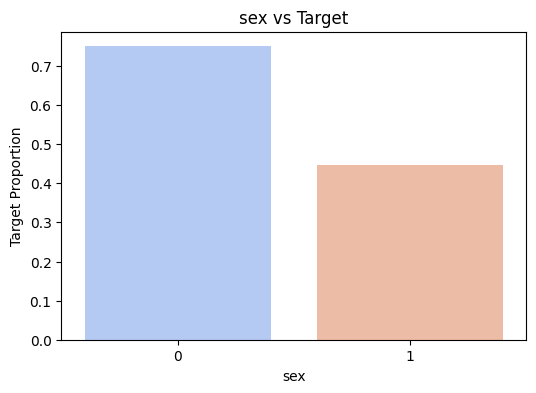

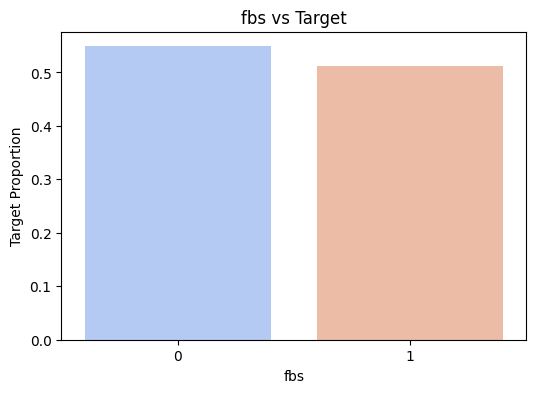

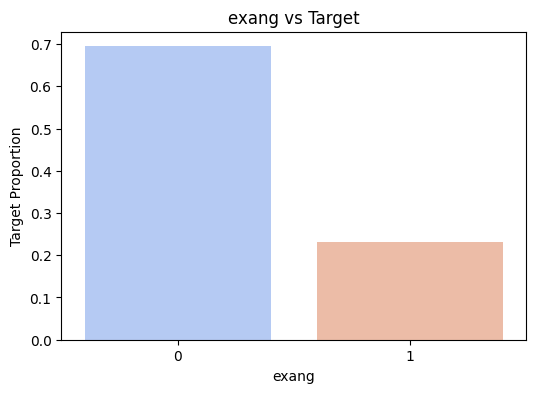

In [210]:
for col in binary_columns.columns:
    if col == "target":
        continue

    plt.figure(figsize=(6, 4))
    sns.barplot(
        x=binary_columns[col],
        hue=binary_columns[col],
        legend=False,
        y=binary_columns["target"],
        errorbar=None,
        palette="coolwarm",
    )
    plt.title(f"{col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Target Proportion")
    plt.show()

#### 2.2.3. <a id='toc2_2_3_'></a>[Categorical columns](#toc0_)


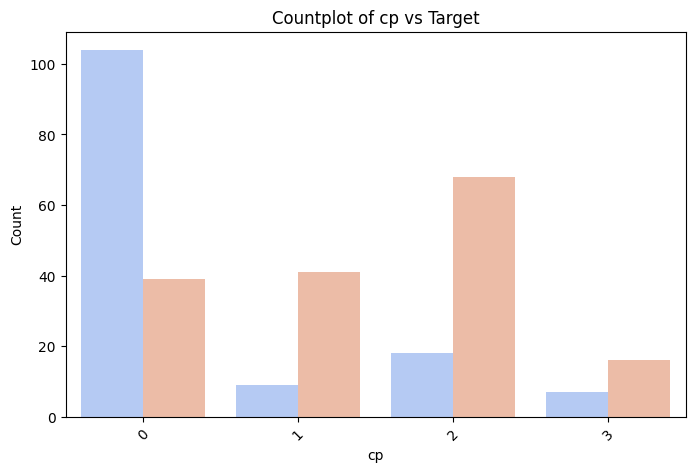

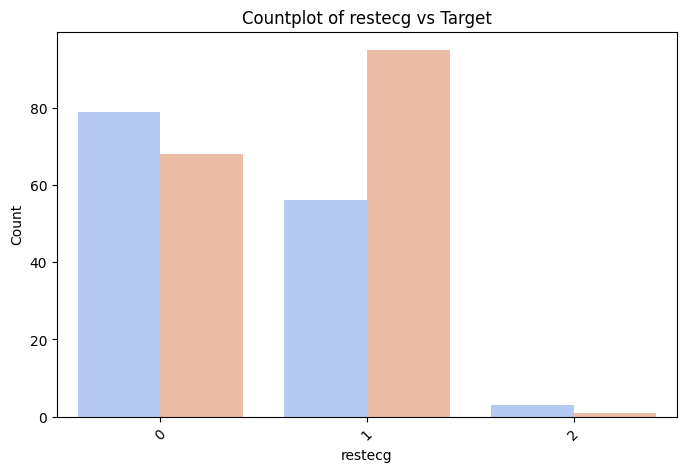

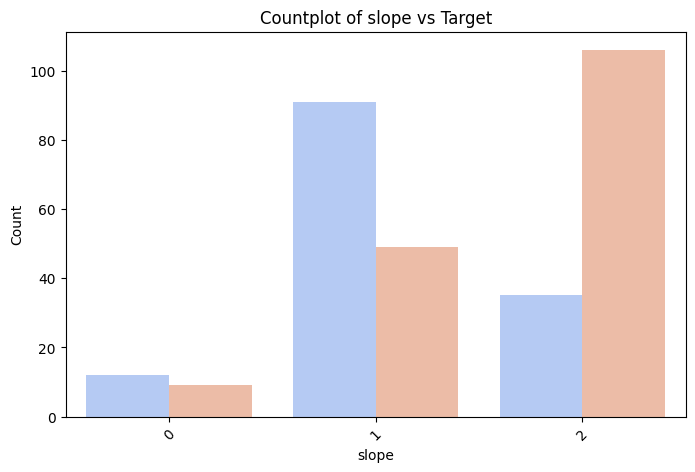

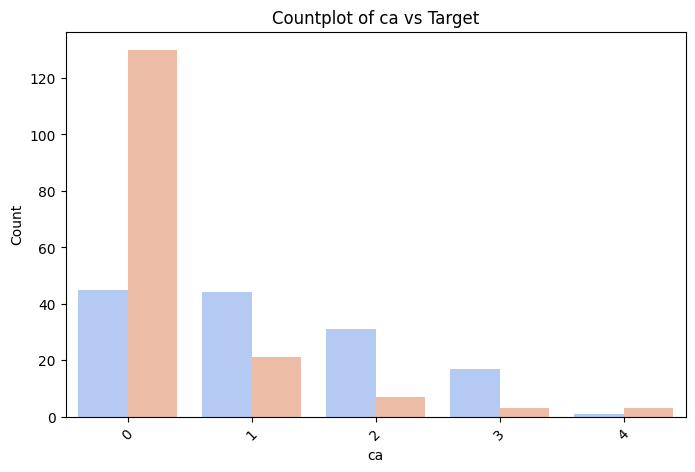

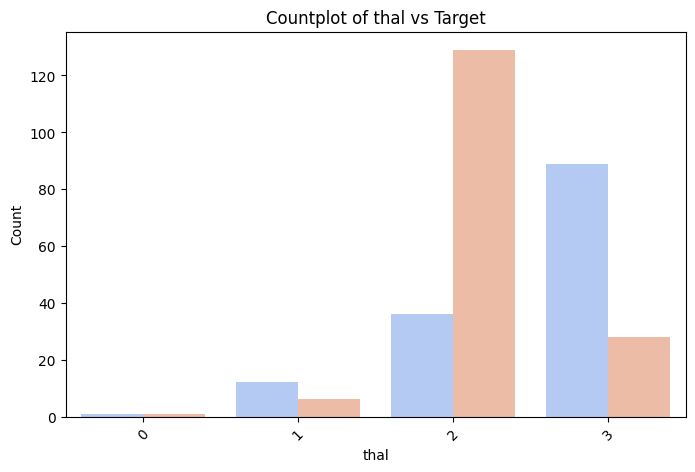

In [211]:
for col in categorical_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        x=categorical_columns[col],
        hue=binary_columns["target"],
        palette="coolwarm",
        legend=False,
    )
    plt.title(f"Countplot of {col} vs Target")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## 3. <a id='toc3_'></a>[Splitting Data For Modeling](#toc0_)


In [212]:
def prepare_data(dataset):
    X = dataset.drop(columns=["target"])
    y = dataset["target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    return X_train, X_test, y_train, y_test

In [213]:
X_train, X_test, y_train, y_test = prepare_data(dataset)

## 4. <a id='toc4_'></a>[Modeling Approaches without Data Preperation](#toc0_)


In [214]:
def train_models(X_train, X_test, y_train, y_test):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=10000),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    }

    results = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[model_name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "PredictedValues": y_pred,
        }

    xgb = XGBClassifier(random_state=42)

    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

    results["XGBoost"] = {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1-Score": f1_score(y_test, y_pred_xgb),
        "PredictedValues": y_pred_xgb,
    }

    return results

In [215]:
results_before_preperation = train_models(X_train, X_test, y_train, y_test)

## 5. <a id='toc5_'></a>[Data Prepearation for Modeling](#toc0_)


### 5.1. <a id='toc5_1_'></a>[Encoding Categorical Variables](#toc0_)


In [216]:
def one_hot_encode_and_replace(dataset, categorical_columns):
    dataset[categorical_columns] = dataset[categorical_columns].astype(str)
    one_hot_encoded = pd.get_dummies(
        dataset[categorical_columns], prefix=categorical_columns, dtype=int
    )
    dataset = dataset.drop(columns=categorical_columns)
    dataset = pd.concat([dataset, one_hot_encoded], axis=1)

    return dataset


categorical_columns = ["cp", "restecg", "slope", "ca", "thal"]
dataset = one_hot_encode_and_replace(dataset, categorical_columns)

dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,0,0,0,0,1,0,0,0,1,0


### 5.2. <a id='toc5_2_'></a>[Transformations for Numeric Features](#toc0_)


In [217]:
def standardize_numerical_columns(dataset, numerical_columns):

    numerical_columns = [col for col in numerical_columns if col in dataset.columns]

    scaler = StandardScaler()
    dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

    return dataset


numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
dataset = standardize_numerical_columns(dataset, numerical_columns)

dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,0,1,...,1,0,0,1,0,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,0,1,...,0,0,0,0,1,0,0,0,1,0


## 6. <a id='toc6_'></a>[Modeling Approaches with Data Preperation](#toc0_)


In [218]:
X_train, X_test, y_train, y_test = prepare_data(dataset)
results_with_preperation = train_models(X_train, X_test, y_train, y_test)

## 7. <a id='toc7_'></a>[Models results visualization and comparison](#toc0_)


### Evaluation Metrics Explained

1. Accuracy

Definition: Accuracy measures the proportion of correctly classified instances among the total instances.
Formula:

$$
$$


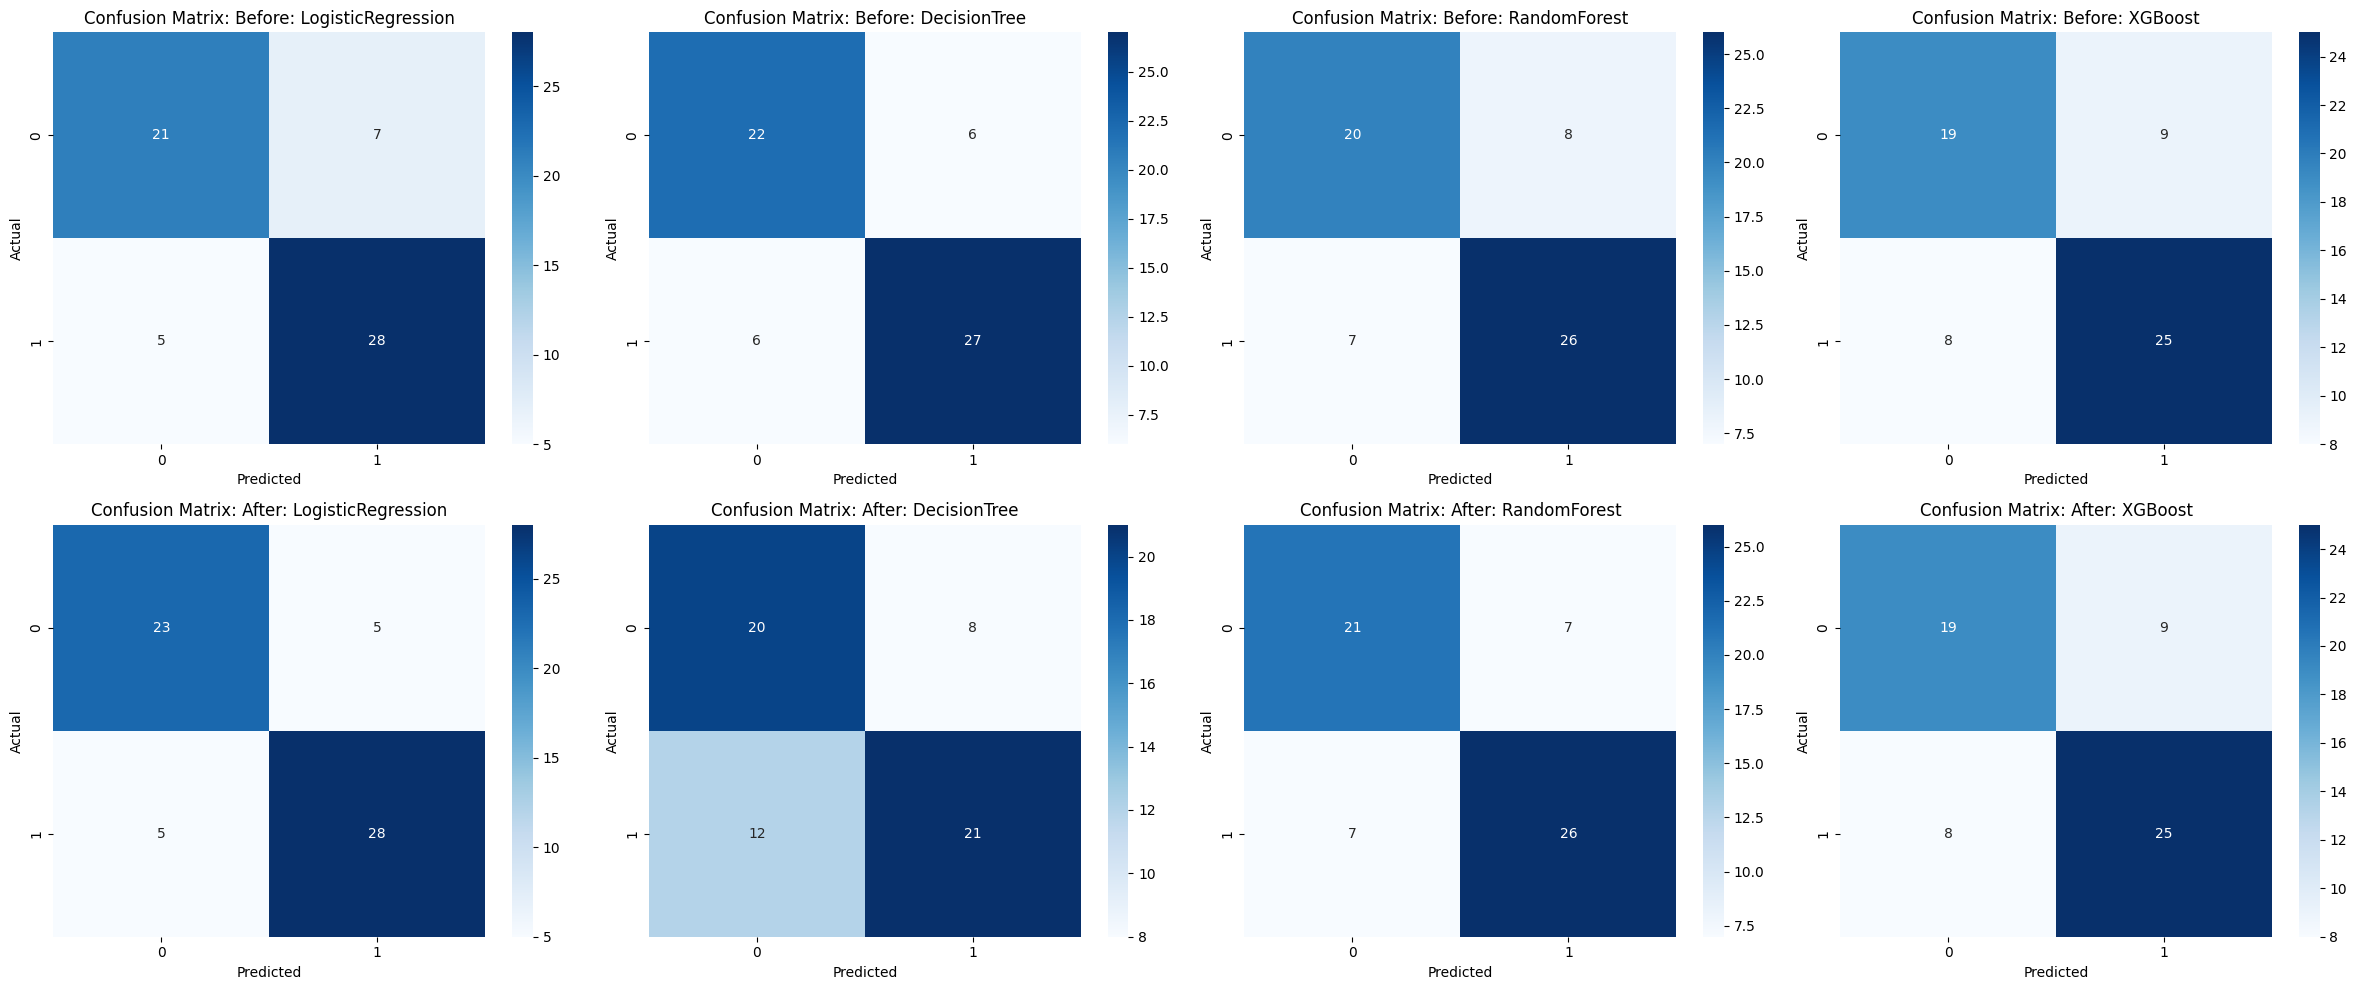

In [219]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix: {model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")


def plot_results(results_before, results_after, y_test):
    _, axes = plt.subplots(2, len(results_before), figsize=(24, 10))

    for i, (model_name, model_results) in enumerate(results_before.items()):
        plot_confusion_matrix(
            y_test,
            model_results["PredictedValues"],
            f"Before: {model_name}",
            axes[0, i],
        )

    for i, (model_name, model_results) in enumerate(results_after.items()):
        plot_confusion_matrix(
            y_test, model_results["PredictedValues"], f"After: {model_name}", axes[1, i]
        )

    plt.tight_layout()
    plt.show()


plot_results(results_before_preperation, results_with_preperation, y_test)

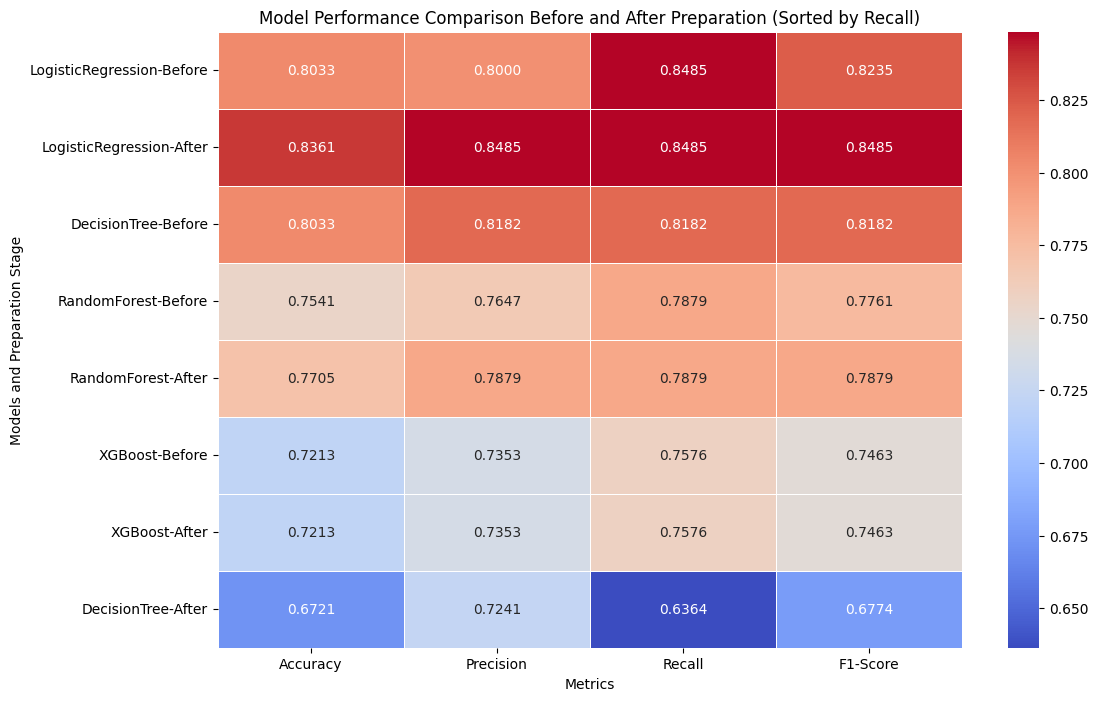

In [ ]:
def rank_models(results):
    metrics_df = pd.DataFrame(results).T.drop(
        columns=["PredictedValues"], errors="ignore"
    )
    metrics_df = metrics_df.apply(pd.to_numeric, errors="coerce")

    ranked_models = metrics_df.sort_values(by="Accuracy", ascending=False)
    return ranked_models


def plot_combined_heatmap(ranked_models_before, ranked_models_after):
    ranked_models_before["Preparation"] = "Before"
    ranked_models_after["Preparation"] = "After"

    combined_df = pd.concat([ranked_models_before, ranked_models_after])
    combined_df = combined_df.reset_index().rename(columns={"index": "Model"})

    combined_df = combined_df.sort_values(by="Accuracy", ascending=False)

    combined_df.set_index(["Model", "Preparation"], inplace=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(combined_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".4f")
    plt.title(
        "Model Performance Comparison Before and After Preparation (Sorted by Accuracy)"
    )
    plt.xlabel("Metrics")
    plt.ylabel("Models and Preparation Stage")
    plt.show()


ranked_models_before = rank_models(results_before_preperation)
ranked_models_after = rank_models(results_with_preperation)

plot_combined_heatmap(ranked_models_before, ranked_models_after)